# Graben

In [1]:
import os
#Run this cell only if you want to run gempy in cuda mode (requires cuda and a dedicated cpu).
#Initial compilation will take a bit longer but the model will run much faster 
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

In [2]:
import gempy as gp
import numpy as np
from sandbox import _test_data

No module named 'osgeo'
Not subsurface compatibility available


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 227, in <module>
    use(config.device)
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 214, in use
    init_dev(device, preallocate=preallocate)
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 99, in init_dev
    **args)
  File "pygpu/gpuarray.pyx", line 658, in pygpu.gpuarray.init
  File "pygpu/gpuarray.pyx", line 587, in pygpu.gpuarray.pygpu_init
pygpu.gpuarray.GpuArrayException: b'Could not load "libnvrtc.so": libnvrtc.so: cannot open shared object file: No such file or directory'


In [3]:
data_path = _test_data.get('gempy_example_data')
geo_data = gp.create_data("Graben", extent=[0, 2000, 0, 2000, 0, 1600], resolution=[50, 50, 50],
                              path_o=data_path + "foliations7.csv",
                              path_i=data_path + "interfaces7.csv")


Active grids: ['regular']


/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/gempy/core/data_modules/geometric_data.py:537: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


In [4]:
gp.map_stack_to_surfaces(geo_data, {"Fault_1": 'Fault_1', "Fault_2": 'Fault_2',
                                    "Strat_Series": ('Sandstone', 'Siltstone', 
                                                     'Shale', 'Sandstone_2', 
                                                     'Schist', 'Gneiss')},
                                  )
geo_data.set_is_fault(['Fault_1', 'Fault_2'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_1,1,Fault,True,True,False
Fault_2,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [5]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_run')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cuda
Precision:  float32
Number of faults:  2
Compilation Done!
Kriging values: 
                         values
range              3249.615362
$C_o$            251428.571429
drift equations   [3, 3, 3, 3]


In [6]:
sol = gp.compute_model(geo_data)

/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.99595e-09): result may not be accurate.
  rval = scipy.linalg.solve(A, b)


/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


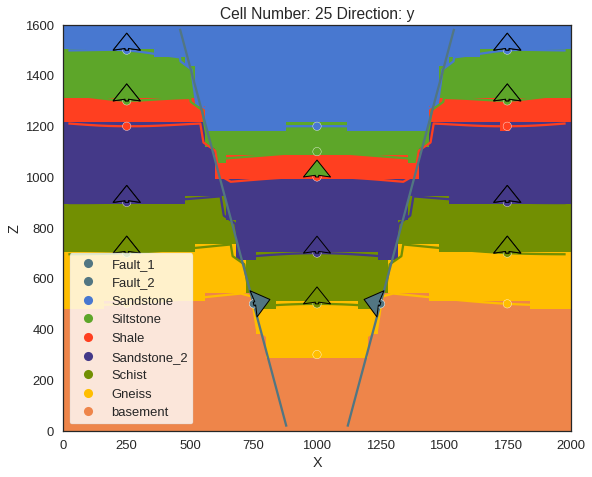

In [7]:
gp.plot_2d(geo_data, cell_number=25,direction='y', show_data=True)

/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


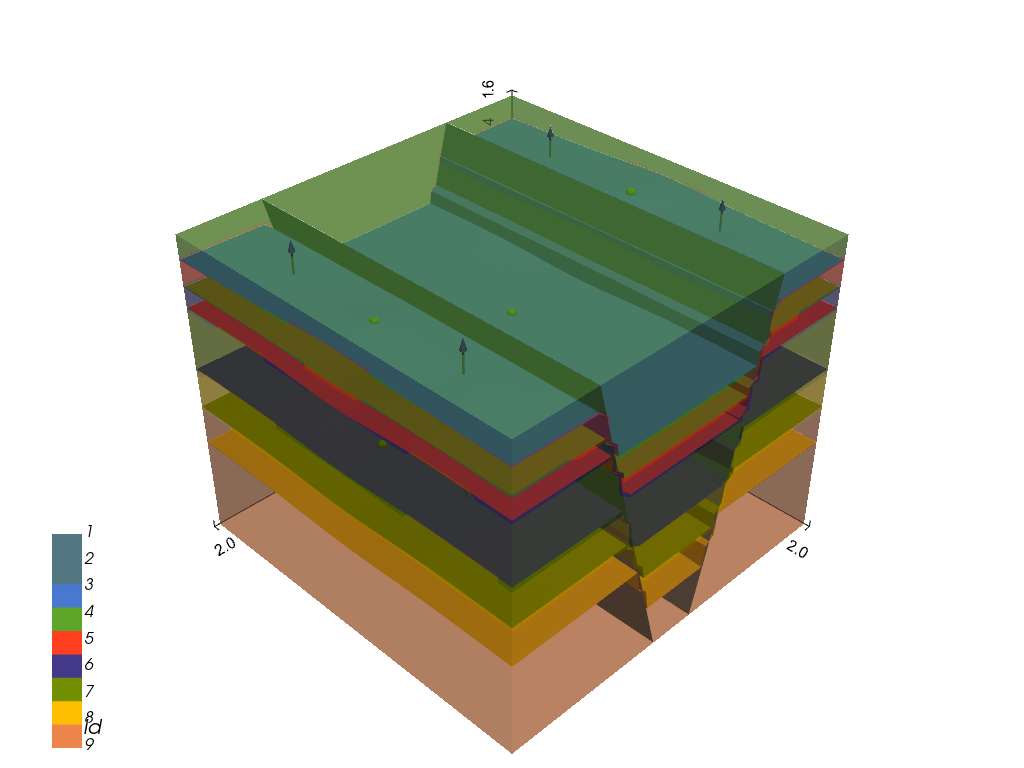

In [8]:
#3d view
gp.plot_3d(geo_data, image=False, show_topography=True, plotter_type='basic', notebook=True, show_lith=True)

## Initialize Sensor and Projector

In [9]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [11]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="dummy")

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.dummy: INFO | DummySensor initialized.


In [12]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)

sandbox.projector.projector: INFO | JSON configuration loaded for projector


Launching server at http://localhost:37825
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [13]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

sandbox.markers.aruco: INFO | Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
sandbox.markers.aruco: INFO | using dummy aruco module
sandbox.markers.aruco: INFO | Aruco module loaded
sandbox.markers.markers_plotting: INFO | Aruco detection ready


In [14]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

sandbox.projector.contourlines: INFO | ContourLinesModule loaded successfully
sandbox.projector.shading: INFO | LightSource set to address RWTH Aachen, Germany at datetime Mon Dec 13 21:29:14 2021
sandbox.projector.cmap: INFO | CmapModule loaded successfully


In [15]:
# Start the thread 
main.run()

sandbox.main_thread: INFO | Thread started or resumed...


In [16]:
main.widget_plot_module()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Show colormap', value=True)
                    [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                    [3] Column
                        [0] Markdown(str)
                        [1] Checkbox(name='Show relief shading', value=True)
                        [2] Tabs
                            [0] WidgetBox
                                [0] Checkbox(name='Manual configuration')
                                [1] FloatSlider(end=360.0, name='Azimuth', value=308.36364873977266)
                                [2] FloatSlider(end=90.0, name='Altitude', value=-53.84479487275386)
                                [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25)
                            [1] WidgetBox
                                [0] TextInput(name='Enter address (e.g. City,..., value='RWTH Aachen, Germany')
                                [1] DatePicker(name='Select date (UTC +0)', value=datetime.date(2021, ...)
                                [2] Row(width_policy='min')
                                    [0] IntSlider(end=23, name='Hour', value=21, width_policy='min')
                                    [1] IntSlider(end=59, name='Minute', value=29, width_policy='min')
                                    [2] IntSlider(end=59, name='Second', value=14, width_policy='min')
                                [3] Markdown(str, sizing_mode='scale_width')
                                [4] Markdown(str, sizing_mode='scale_width')
                                [5] Markdown(str, sizing_mode='scale_width')
                                [6] Markdown(str, sizing_mode='scale_width')
                            [2] WidgetBox
                                [0] Checkbox(name='Start day simulation i...)
                [1] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Active contours', value=True)
                    [2] Checkbox(name='Automatic levels f...)
                    [3] Markdown(str)
                    [4] WidgetBox
                        [0] Checkbox(name='Show major contours', value=True)
                        [1] IntInput(name='Choose a contour step', value=100)
                        [2] Checkbox(name='Show minor contours', value=True)
                        [3] IntInput(name='Choose a minor c..., value=50)
                        [4] Checkbox(name='Show contours label', value=True)
                        [5] IntInput(name='set a contour l..., value=15)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Aruco Detection', value=True)
                    [2] Column
                        [0] Markdown(str)
                        [1] Row
                            [0] WidgetBox
                                [0] Checkbox(name='Show aruco location', value=True)
                                [1] Checkbox(name='Show aruco id', value=True)
                                [2] Checkbox(name='Show line connecting a...)
                                [3] ColorPicker(name='Color', value='#ff0000')
                            [1] WidgetBox
                                [0] Markdown(str)
                                [1] Row
                                    [0] IntInput(name='id', value=1, width=70)
                                    [1] IntInput(name='x coordinate', value=50, width=70)
                                    [2] IntInput(name='y coordinate', value=50, width=70)
                                [2] Button(button_type='success', name='Add dummy aruco dict')
                                [3] Button(button_type='warning', name='Clear aruco dict')
                [1] Column
                    [0] Markdown(str)
                    [1] RadioB

## Initialize the gempy module 

In [17]:
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = geo_data, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = False,
                 )

scale in Model units/ mm (X,Y,Z): [2.0, 2.5, 5.0]
the shown extent is [0.0, 2000.0, 0.0, 2000.0] 
Active grids: ['regular' 'topography' 'sections']


/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.99595e-09): result may not be accurate.
  rval = scipy.linalg.solve(A, b)


sandbox.modules.gempy.gempy_module: INFO | GemPyModule loaded successfully


In [18]:
main.add_module(name='gempy', module=gpsb)

sandbox.main_thread: INFO | module gempy added to modules


In [17]:
#Turn on Hill Shading
gpsb.show_hillshades = True
gpsb.show_lith = True
gpsb.show_boundary = True
gpsb.show_contour = False
gpsb.show_only_faults = False
gpsb.show_fill_contour = True


In [19]:





main.stop()

sandbox.main_thread: INFO | Thread stopped.
